In [4]:
import pandas as pd
import numpy as np

In [10]:
df=pd.DataFrame()

In [11]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [13]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

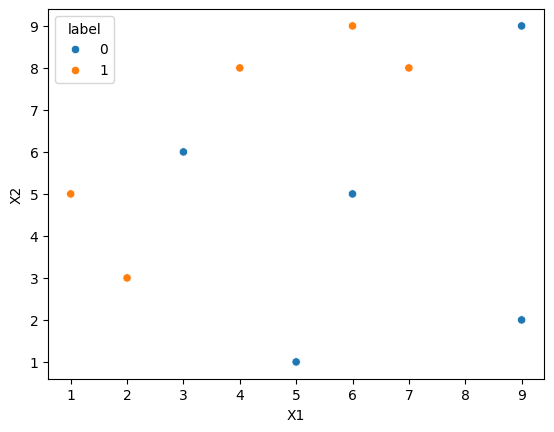

In [14]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [15]:
df['weights']=1/df.shape[0]

In [16]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [17]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1)

In [19]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [21]:
dt1.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

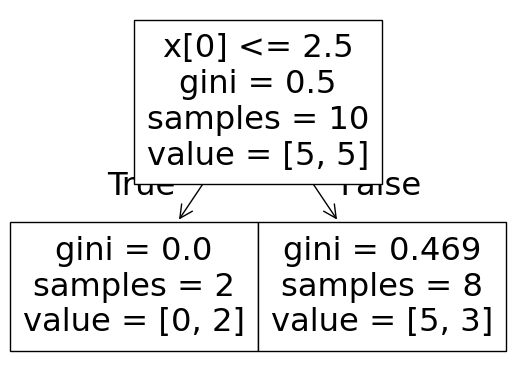

In [22]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [23]:
df['y_pred']=dt1.predict(x)

In [24]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [25]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/error)

In [26]:
alpha1=calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [27]:
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)

In [28]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [29]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [30]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [31]:
df['Normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [32]:
df

,X1,X2,label,weights,y_pred,updated_weights,Normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [33]:
df['Normalized_weights'].sum()

np.float64(1.0)

In [34]:
df['cumsum_upper']=np.cumsum(df['Normalized_weights'])

In [35]:
df['cumsum_lower']=df['cumsum_upper']-df['Normalized_weights']

In [36]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [37]:
def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper']>a and a>row['cumsum_lower']:
                indices.append(index)
    return indices

In [38]:
index_values=create_new_dataset(df)

In [39]:
index_values

[2, 5, 3, 4, 2, 5, 1, 0, 7, 3]

In [40]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [41]:
second_df

,X1,X2,label,weights
2,3,6,0,0.1
5,6,9,1,0.1
3,4,8,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
1,2,3,1,0.1
0,1,5,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1


In [42]:
dt2=DecisionTreeClassifier(max_depth=1)

In [43]:
x=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [45]:
dt2.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.5, '  False')]

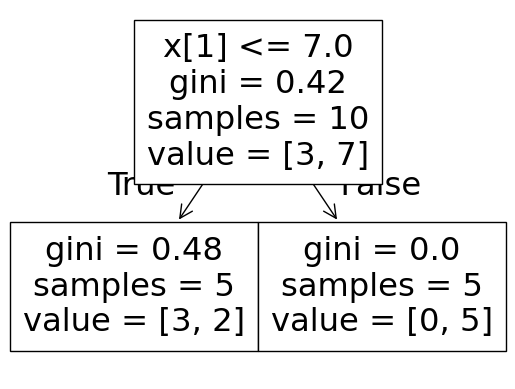

In [46]:
plot_tree(dt2)

In [49]:
second_df['y_pred'] = dt2.predict(x)
second_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
5,6,9,1,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
2,3,6,0,0.1,0
5,6,9,1,0.1,1
1,2,3,1,0.1,0
0,1,5,1,0.1,0
7,7,8,1,0.1,1
3,4,8,1,0.1,1


In [50]:
alpha2 = calculate_model_weight(0.1)

In [51]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [52]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
1,2,3,1,0.1,0,0.297427
0,1,5,1,0.1,0,0.297427
7,7,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622


In [53]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
2,3,6,0,0.1,0,0.033622,0.038922
5,6,9,1,0.1,1,0.033622,0.038922
3,4,8,1,0.1,1,0.033622,0.038922
4,5,1,0,0.1,0,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
5,6,9,1,0.1,1,0.033622,0.038922
1,2,3,1,0.1,0,0.297427,0.344313
0,1,5,1,0.1,0,0.297427,0.344313
7,7,8,1,0.1,1,0.033622,0.038922
3,4,8,1,0.1,1,0.033622,0.038922


In [54]:
second_df['nomalized_weights'].sum()

np.float64(0.9999999999999999)

In [55]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [56]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [58]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
2,3,6,0,0.1,0,0.038922,0.000000,0.038922
5,6,9,1,0.1,1,0.038922,0.038922,0.077843
3,4,8,1,0.1,1,0.038922,0.077843,0.116765
4,5,1,0,0.1,0,0.038922,0.116765,0.155687
2,3,6,0,0.1,0,0.038922,0.155687,0.194608
5,6,9,1,0.1,1,0.038922,0.194608,0.233530
1,2,3,1,0.1,0,0.344313,0.233530,0.577843
0,1,5,1,0.1,0,0.344313,0.577843,0.922157
7,7,8,1,0.1,1,0.038922,0.922157,0.961078
3,4,8,1,0.1,1,0.038922,0.961078,1.000000


In [59]:
index_values = create_new_dataset(second_df)
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
2,3,6,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
5,6,9,1,0.1
0,1,5,1,0.1
2,3,6,0,0.1
2,3,6,0,0.1
0,1,5,1,0.1
5,6,9,1,0.1
2,3,6,0,0.1


In [61]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
dt3.fit(X,y)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [63]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
2,3,6,0,0.1,1
4,5,1,0,0.1,1
5,6,9,1,0.1,0
0,1,5,1,0.1,0
2,3,6,0,0.1,1
2,3,6,0,0.1,0
0,1,5,1,0.1,0
5,6,9,1,0.1,1
2,3,6,0,0.1,1


In [64]:
alpha3 = calculate_model_weight(0.7)
alpha3

np.float64(-0.4236489301936017)

In [65]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


In [66]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [67]:
dt2.predict(query)

array([0])

In [68]:
dt3.predict(query)

array([0])

In [69]:
alpha1*1 + alpha2*(0) + alpha3*(0)

np.float64(0.42364893019360184)

In [70]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0])

In [71]:
dt2.predict(query)

array([1])

In [72]:
dt3.predict(query)

array([1])

In [73]:
alpha1*0 + alpha2*(1) + alpha3*(1)

np.float64(0.6749633584745081)

In [74]:
np.sign(0.67)

np.float64(1.0)